In [15]:
import pandas as pd
import datetime
from datetime import timedelta
import time
import matplotlib.pyplot as plt

In [16]:
OUTPUT_DIRECTORY = "G:\\My Drive\\presentations\\CMU\\12770 - Autonomous Sustainable Buildings From Theory to Practice\\Chapter 10 - Building Energy Simulations\\"
OUTPUT_FILE = OUTPUT_DIRECTORY + "My First EnergyPlus.csv"
SimulationData = pd.read_csv(OUTPUT_FILE)

In [17]:
SimulationData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 10 columns):
 #   Column                                                                                         Non-Null Count  Dtype  
---  ------                                                                                         --------------  -----  
 0   Date/Time                                                                                      52560 non-null  object 
 1   THERMAL ZONE 1:Zone Mean Air Temperature [C](TimeStep)                                         52560 non-null  float64
 2   THERMAL ZONE 2:Zone Mean Air Temperature [C](TimeStep)                                         52560 non-null  float64
 3   THERMAL ZONE 3:Zone Mean Air Temperature [C](TimeStep)                                         52560 non-null  float64
 4   THERMAL ZONE 1 IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Heating Rate [W](TimeStep)   52560 non-null  float64
 5   THERMAL ZONE 1 IDE

In [18]:
def eplustimestamp(simdata):
    timestampdict={}
    for i,row in simdata.T.iteritems():
        timestamp = str(2013) + row['Date/Time']
        try:
            timestampdict[i] = datetime.datetime.strptime(timestamp,'%Y %m/%d  %H:%M:%S')
        except ValueError:
            tempts = timestamp.replace(' 24', ' 23')
            timestampdict[i] = datetime.datetime.strptime(tempts,'%Y %m/%d  %H:%M:%S')
            timestampdict[i] += timedelta(hours=1)
    timestampseries = pd.Series(timestampdict)
    return timestampseries

In [19]:
SimulationData.index = eplustimestamp(SimulationData)

C:\Users\miguelmartin\AppData\Local\Temp\ipykernel_20088\3622186085.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i,row in simdata.T.iteritems():


<Axes: >

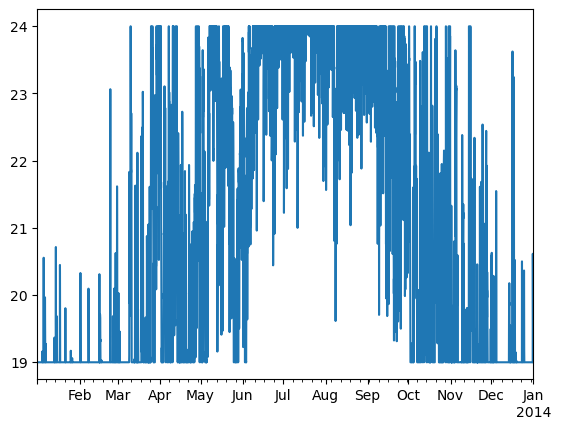

In [20]:
Zone_1_Indoor_Temperature = pd.Series(index = SimulationData.index, data = SimulationData['THERMAL ZONE 1:Zone Mean Air Temperature [C](TimeStep)'])
Zone_1_Indoor_Temperature.plot()

<Axes: >

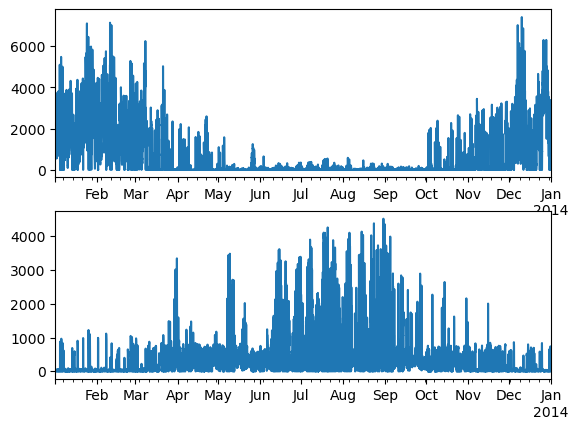

In [21]:
Zone_1_Heating_Load = pd.Series(index = SimulationData.index, data = SimulationData['THERMAL ZONE 1 IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Heating Rate [W](TimeStep)'])
Zone_1_Cooling_Load = pd.Series(index = SimulationData.index, data = SimulationData['THERMAL ZONE 1 IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Cooling Rate [W](TimeStep)'])
fig, axes = plt.subplots(2)
Zone_1_Heating_Load.plot(ax=axes[0])
Zone_1_Cooling_Load.plot(ax=axes[1])